In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [430]:
df_car = pd.read_csv("D:/Assignment\ToyotaCorolla.csv", encoding='latin1')

In [431]:
df_car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [432]:
df = df_car [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [433]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [434]:
df = df.rename({'Age_08_04': 'age','Quarterly_Tax': 'tax'}, axis= 1)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [436]:
df.isnull().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
tax       0
Weight    0
dtype: int64

In [437]:
df[df.duplicated()].shape

(1, 9)

In [438]:
df[df.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [439]:
df_new = df.drop_duplicates(). reset_index (drop = True)

In [440]:
df_new.shape

(1435, 9)

In [441]:
df_new.describe()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

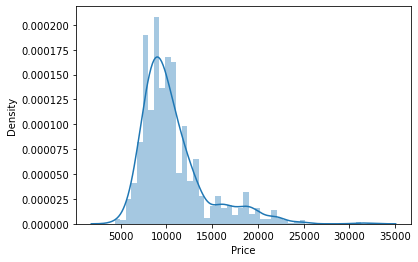

In [442]:
sns.distplot(df_car ['Price'])  #normal distribution

<AxesSubplot:xlabel='age', ylabel='Density'>

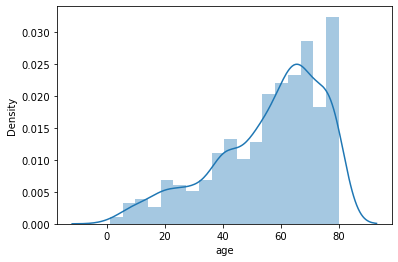

In [443]:
sns.distplot(df['age']) #normal distribution

<AxesSubplot:xlabel='KM', ylabel='Density'>

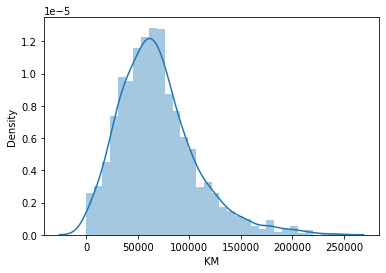

In [444]:
sns.distplot(df['KM']) #normal distribution

<AxesSubplot:xlabel='HP', ylabel='Density'>

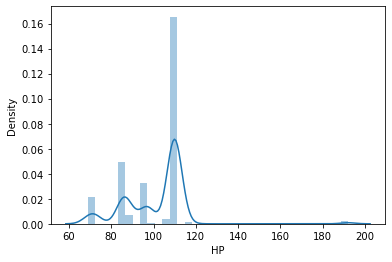

In [445]:
sns.distplot(df['HP'])

<AxesSubplot:xlabel='cc', ylabel='Density'>

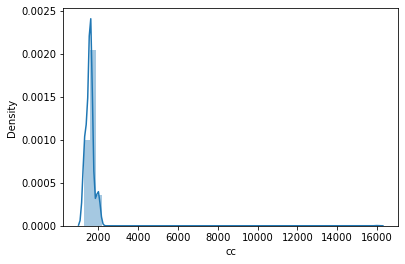

In [446]:
sns.distplot(df['cc'])

<AxesSubplot:xlabel='Doors', ylabel='Density'>

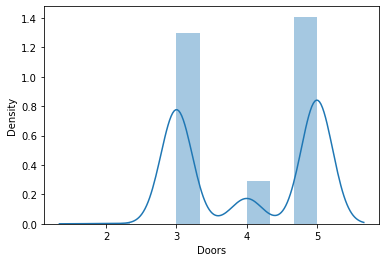

In [447]:
sns.distplot(df['Doors'])

<AxesSubplot:xlabel='Gears', ylabel='Density'>

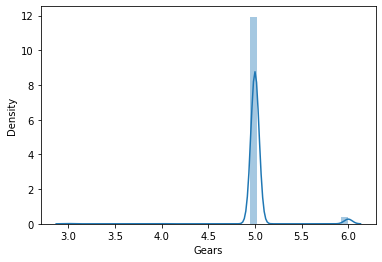

In [448]:
sns.distplot(df['Gears'])

<AxesSubplot:xlabel='tax', ylabel='Density'>

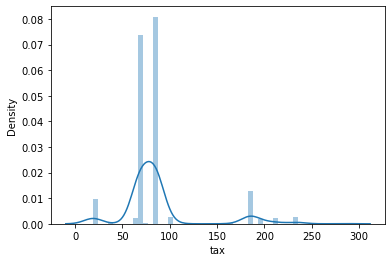

In [449]:
sns.distplot(df['tax'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

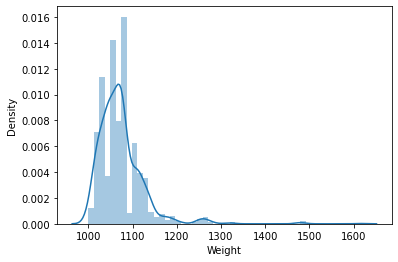

In [450]:
sns.distplot(df['Weight']) #normal distribution

In [451]:
norm_price = shapiro(df['Price'])
norm_km = shapiro(df['KM'])
norm_hp = shapiro(df['HP'])
norm_Doors = shapiro(df['Doors'])
norm_weight = shapiro(df['Weight'])

In [452]:
print(norm_km,'\n'
      ,norm_price,'\n',
      norm_hp,'\n',
      norm_Doors,'\n',
      norm_weight) #since pvalue is not less than .05 - reject null value -> 
                   #no data is normally distributed

ShapiroResult(statistic=0.9476680755615234, pvalue=3.519194831128401e-22) 
 ShapiroResult(statistic=0.8522821664810181, pvalue=1.2140658331804948e-34) 
 ShapiroResult(statistic=0.7063508629798889, pvalue=1.6815581571897805e-44) 
 ShapiroResult(statistic=0.6984997391700745, pvalue=7.006492321624085e-45) 
 ShapiroResult(statistic=0.7808084487915039, pvalue=3.763607415483594e-40)


<AxesSubplot:>

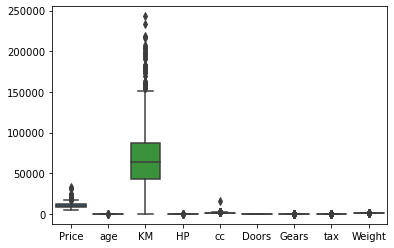

In [453]:
sns.boxplot(data= df_new)

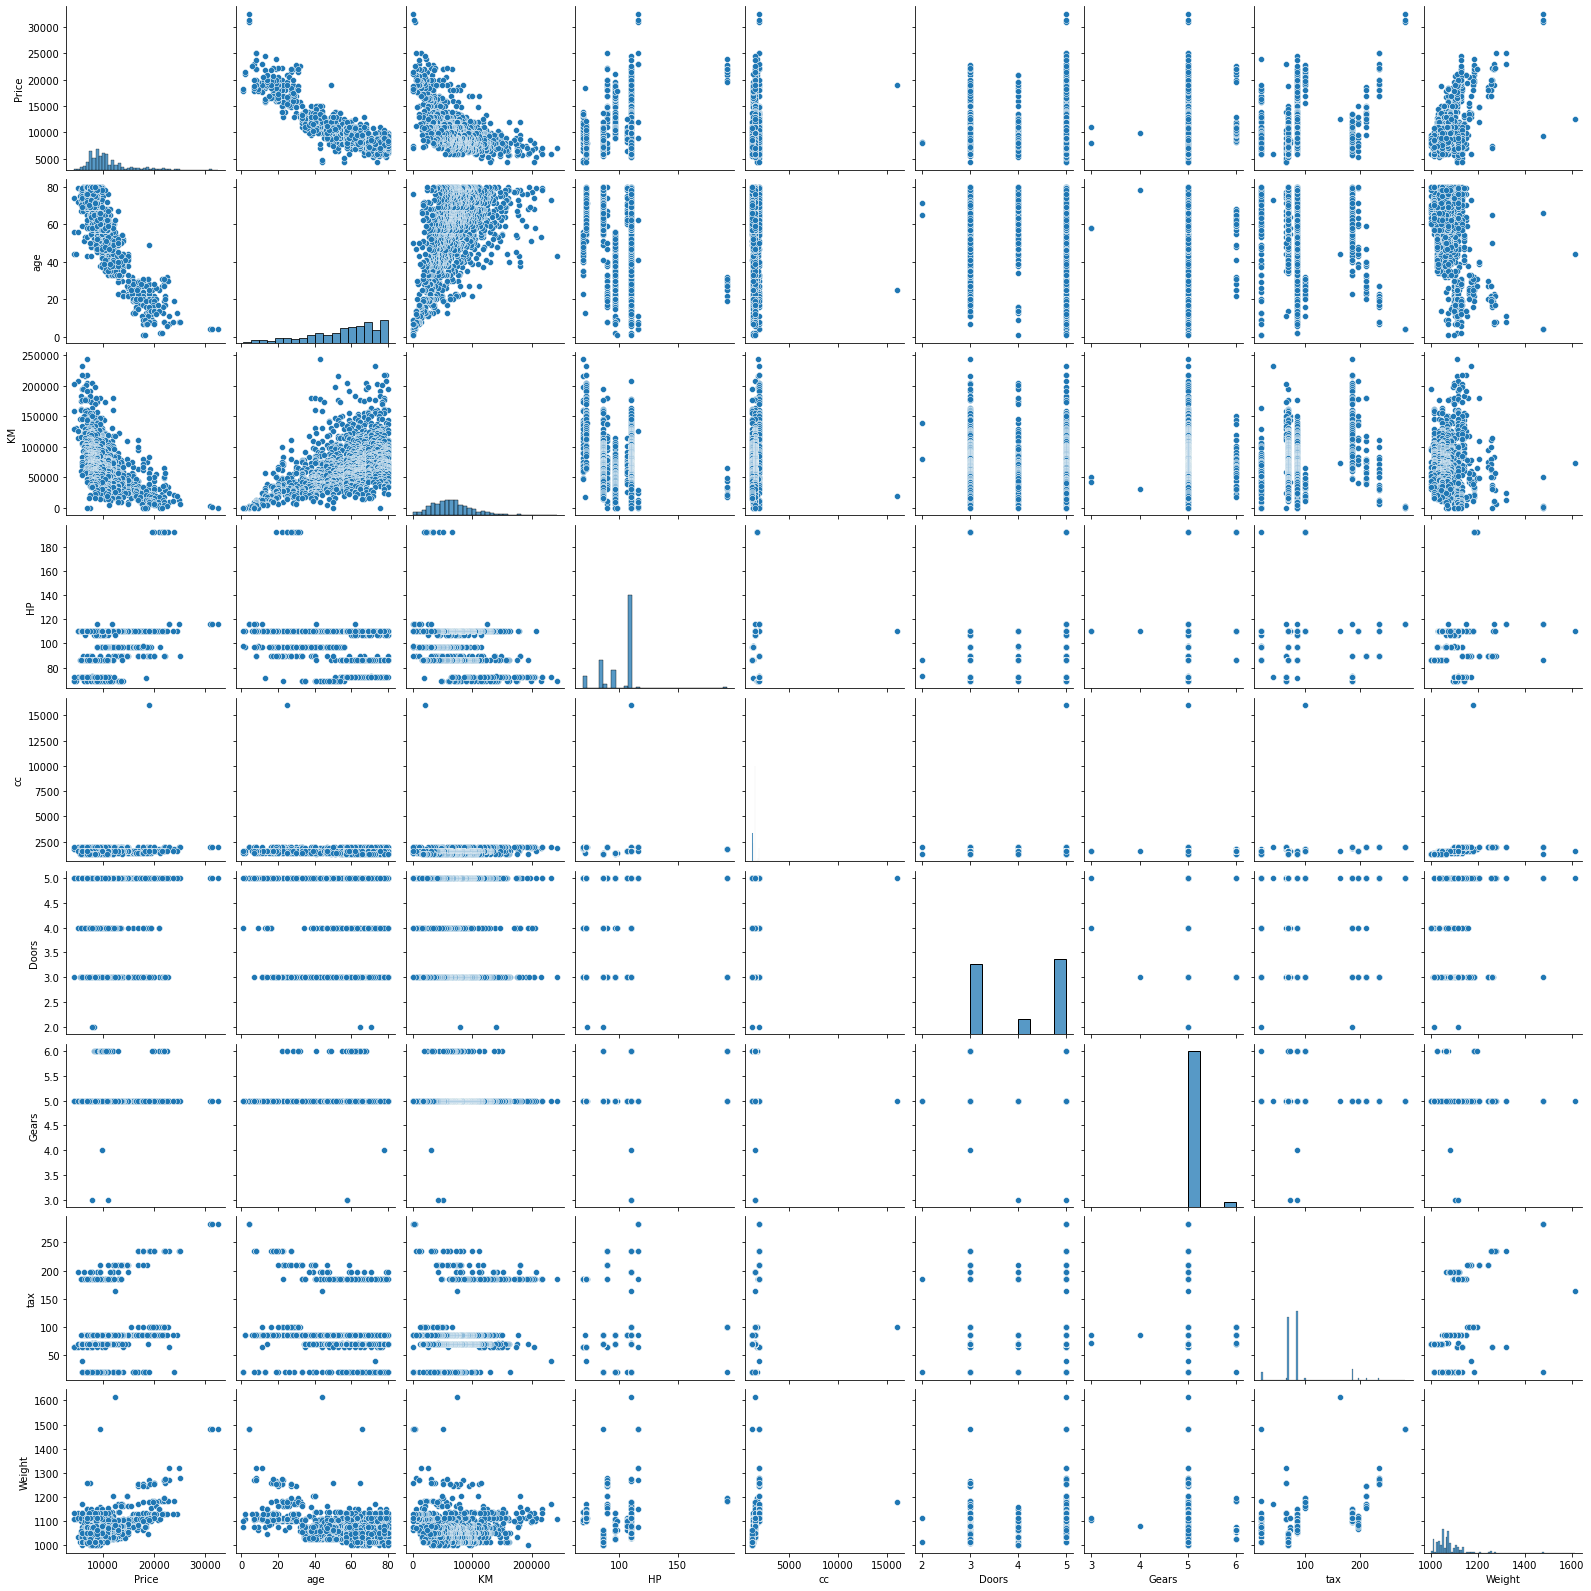

In [454]:
sns.pairplot(df_new)

<AxesSubplot:>

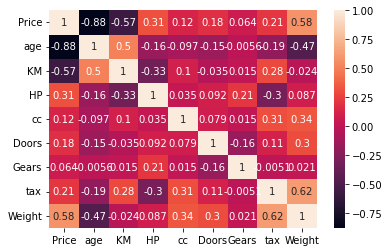

In [455]:
heat_corr = df_new.corr()
sns.heatmap(data= heat_corr, annot= True)

In [456]:
model = smf.ols("Price~ age+KM+HP+cc+Doors+Gears+tax+Weight", data= df_new).fit()

In [457]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:24:55   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [458]:
model1 = smf.ols("np.log(Price)~ np.log(age+KM+HP+cc+Doors+Gears+tax+Weight)", data= df_new).fit()

In [459]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1075.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.46e-176
Time:                        01:24:56   Log-Likelihood:                 115.71
No. Observations:                1435   AIC:                            -227.4
Df Residuals:                    1433   BIC:                            -216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    12.6087      0.103    122.244      0.000      12.406      12.811
np.log(age + KM + HP + cc + Doors + Gears + tax + Weight)    -0.3064      0.009    -32.781      0.000      -0.325      -0.288
==============================================================================
Omnibus:                       66.472   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.094
Skew:                           0.184   Prob(JB):                     1.74e-40
Kurtosis:                       4.711   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
df_final = df_new[['age','KM','HP','cc', 'tax', 'Price', 'Gears', "Weight", "Doors"]]

In [461]:
df_final

,age,KM,HP,cc,tax,Price,Gears,Weight,Doors
0,23,46986,90,2000,210,13500,5,1165,3
1,23,72937,90,2000,210,13750,5,1165,3
2,24,41711,90,2000,210,13950,5,1165,3
3,26,48000,90,2000,210,14950,5,1165,3
4,30,38500,90,2000,210,13750,5,1170,3
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,69,7500,5,1025,3
1431,72,19000,86,1300,69,10845,5,1015,3
1432,71,17016,86,1300,69,8500,5,1015,3
1433,70,16916,86,1300,69,7250,5,1015,3


In [462]:
model_influ = model.get_influence()

In [463]:
dist = model_influ.summary_frame()

In [464]:
dist

,dfb_Intercept,dfb_age,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.039757,0.044125,0.059647,-0.001706,-0.014444,0.095786,0.022500,-0.155546,0.021622,7.222211e-03,-2.466454,0.010572,-0.254951,-2.470865,-0.255407
1,-0.033433,0.058466,-0.000411,-0.010377,-0.007738,0.074079,0.020493,-0.106563,0.018234,3.945480e-03,-1.875391,0.009995,-0.188439,-1.877049,-0.188606
2,-0.031889,0.028016,0.064036,0.000786,-0.013104,0.081986,0.018480,-0.136620,0.016686,5.442240e-03,-2.120285,0.010778,-0.221315,-2.122890,-0.221587
3,-0.015266,0.013633,0.028787,-0.000707,-0.006224,0.042288,0.009900,-0.068862,0.007311,1.381834e-03,-1.090606,0.010348,-0.111519,-1.090679,-0.111526
4,-0.014159,-0.002985,0.073054,0.004572,-0.010295,0.072592,0.015284,-0.116948,-0.000800,4.097835e-03,-1.836023,0.010822,-0.192043,-1.837552,-0.192203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.005349,-0.035442,0.055014,0.033261,0.004907,0.019366,-0.002640,-0.005346,-0.002616,6.045847e-04,-0.967363,0.005781,-0.073765,-0.967341,-0.073763
1431,0.016865,0.077300,-0.116938,-0.062658,-0.007190,-0.034299,0.005745,0.021008,-0.006023,2.607901e-03,1.908351,0.006404,0.153203,1.910123,0.153345
1432,0.000314,0.001317,-0.002066,-0.001102,-0.000120,-0.000597,0.000104,0.000377,-0.000126,8.041106e-07,0.033321,0.006476,0.002690,0.033310,0.002689
1433,-0.010064,-0.037389,0.060656,0.032831,0.003556,0.017799,-0.003068,-0.011134,0.004434,6.998548e-04,-0.993777,0.006337,-0.079364,-0.993772,-0.079364


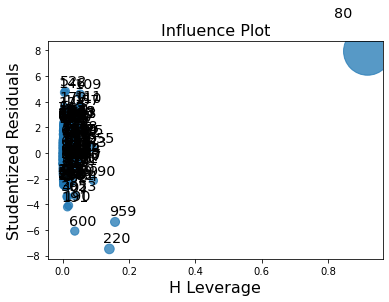

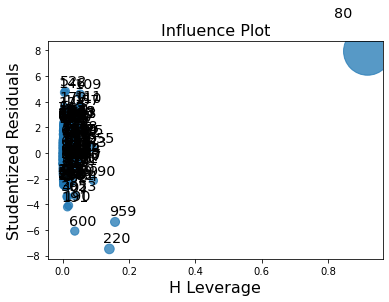

In [465]:
model_influ.plot_influence()

In [466]:
df_final = df_new.drop(index= 80, axis= 0). reset_index(drop=True)

In [467]:
df_final

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [468]:
#now we are applying Standard Scaler. Since the valuse are not normally distribiuted

In [469]:
from sklearn.preprocessing import StandardScaler

col_names = df_final.columns
features = df_final[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
std_scaled = pd.DataFrame(features, columns = col_names)
std_scaled.head()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,0.773094,-1.779543,-0.576998,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
1,0.842496,-1.779543,0.115598,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
2,0.898018,-1.725621,-0.717781,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
3,1.175628,-1.617777,-0.549936,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
4,0.842496,-1.402088,-0.803478,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.874254


In [470]:
std_scaled

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,0.773094,-1.779543,-0.576998,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
1,0.842496,-1.779543,0.115598,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
2,0.898018,-1.725621,-0.717781,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
3,1.175628,-1.617777,-0.549936,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.778422
4,0.842496,-1.402088,-0.803478,-0.766773,2.319462,-1.083747,-0.140525,3.002793,1.874254
...,...,...,...,...,...,...,...,...,...
1429,-0.892564,0.700875,-1.282699,-1.033801,-1.425944,-1.083747,-0.140525,-0.439745,-0.904889
1430,0.036040,0.862641,-1.323906,-1.033801,-1.425944,-1.083747,-0.140525,-0.439745,-1.096554
1431,-0.614955,0.808719,-1.376856,-1.033801,-1.425944,-1.083747,-0.140525,-0.439745,-1.096554
1432,-0.961967,0.754797,-1.379525,-1.033801,-1.425944,-1.083747,-0.140525,-0.439745,-1.096554


In [471]:
new_vif = pd.DataFrame()
x1 = std_scaled[['age','KM','HP','cc','Doors','tax','Gears','Weight']]
new_vif['vif_values'] = [variance_inflation_factor(x1.values, i) for i in range (x1.shape[1])]
new_vif['features'] = x1.columns
new_vif.round(1)

,vif_values,features
0,1.9,age
1,1.9,KM
2,1.6,HP
3,2.7,cc
4,1.2,Doors
5,2.8,tax
6,1.1,Gears
7,2.8,Weight


In [472]:
#vif all less than 5 we can consider all the features

In [473]:
checking = smf.ols("Price~ age+KM+HP+cc+Doors+Gears+tax+Weight", data= df_final).fit()
checking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:25:05   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
tax            8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [474]:
k = df_final.shape[1]
n = df_final.shape[0]
lev_cutoff = (3*(k+1))/n

while np.max(c)>lev_cutoff:
    run_model = smf.ols("Price~ age+KM+HP+cc+Doors+Gears+tax+Weight", data= df_final).fit()
    (c,_) = run_model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    df_final = df_final.drop(df_final.index[[np.argmax(c)]], axis= 0).reset_index(drop = True)
    df_final
else:
    final_model = smf.ols("Price~ age+KM+HP+cc+Doors+Gears+tax+Weight", data= df_final).fit()
    print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:25:05   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.0

In [475]:
input_df = df_final[['age','KM','HP','cc','Doors','tax','Gears','Weight']]

Predicted_price = final_model.predict(input_df)

In [476]:
df_final["Predicted_price"] = Predicted_price

In [477]:
df_final

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight,Predicted_price
0,13500,23,46986,90,2000,3,5,210,1165,16513.565909
1,13750,23,72937,90,2000,3,5,210,1165,16051.656226
2,13950,24,41711,90,2000,3,5,210,1165,16486.949796
3,14950,26,48000,90,2000,3,5,210,1165,16133.995128
4,13750,30,38500,90,2000,3,5,210,1170,15921.372341
...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8970.611964
1430,10845,72,19000,86,1300,3,5,69,1015,8435.944671
1431,8500,71,17016,86,1300,3,5,69,1015,8591.765915
1432,7250,70,16916,86,1300,3,5,69,1015,8714.053275


<AxesSubplot:xlabel='Price', ylabel='Predicted_price'>

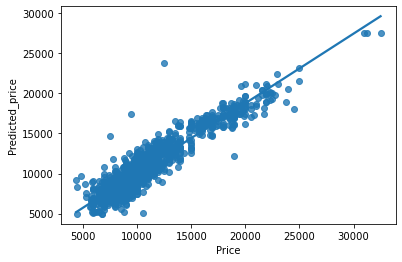

In [478]:
sns.regplot(x = df_final["Price"], y = df_final['Predicted_price'], data= df_final, ci = None)

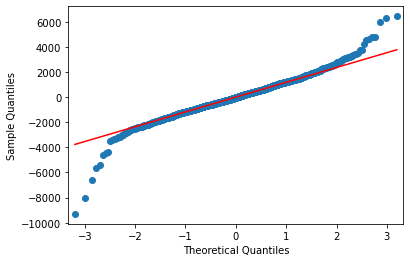

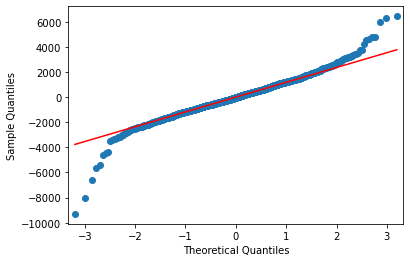

In [479]:
sm.qqplot(model.resid, line= 'q') # Initial model

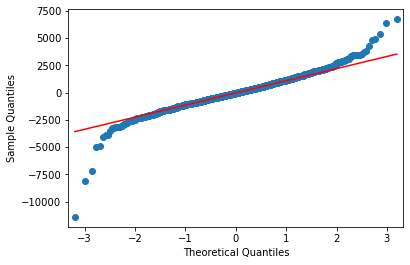

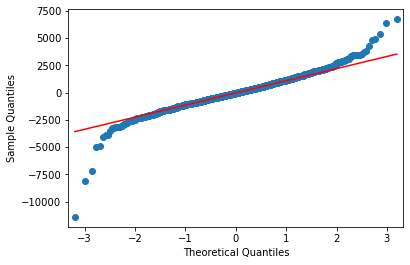

In [480]:
sm.qqplot(final_model.resid, line= 'q')  # final model